In [2]:
import pandas as pd
import yfinance as yf
import os
from pandas import set_option
pd.set_option('max_rows',1000)
pd.set_option('max_columns',1000)

# Get all list of csv

In [3]:

data_dir = './options_data/semi_original'

for i in os.listdir(data_dir)[:3]:#shorten
    print(i)

AAPL_options.csv


# Function to apply to each csv

In [4]:
df_orig = pd.read_csv('./options_data/semi_original/AAPL_options.csv')
df_orig.drop('Unnamed: 0',axis=1,inplace=True)
df_orig

,strike_date,days_to_expiry,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,18/6/2021,10,AAPL210618C00018750,9/11/2020 15:45,18.75,102.40,0.00,0.00,0.000000,0.000000,1.0,0.0,0.000010,True,REGULAR,USD
1,18/6/2021,10,AAPL210618C00020000,2/11/2020 15:18,20.00,90.00,0.00,0.00,0.000000,0.000000,1.0,0.0,0.000010,True,REGULAR,USD
2,18/6/2021,10,AAPL210618C00022500,3/9/2020 18:47,22.50,100.80,89.70,91.75,0.000000,0.000000,NaN,28.0,0.000010,True,REGULAR,USD
3,18/6/2021,10,AAPL210618C00025000,5/11/2020 20:47,25.00,93.45,0.00,0.00,0.000000,0.000000,300.0,0.0,0.000010,True,REGULAR,USD
4,18/6/2021,10,AAPL210618C00027500,5/11/2020 19:56,27.50,91.40,0.00,0.00,0.000000,0.000000,100.0,0.0,0.000010,True,REGULAR,USD
5,18/6/2021,10,AAPL210618C00030000,6/11/2020 20:47,30.00,89.07,0.00,0.00,0.000000,0.000000,281.0,0.0,0.000010,True,REGULAR,USD
6,18/6/2021,10,AAPL210618C00031250,5/11/2020 19:56,31.25,87.85,0.00,0.00,0.000000,0.000000,50.0,0.0,0.000010,True,REGULAR,USD
7,18/6/2021,10,AAPL210618C00032500,5/11/2020 19:56,32.50,86.35,0.00,0.00,0.000000,0.000000,100.0,0.0,0.000010,True,REGULAR,USD
8,18/6/2021,10,AAPL210618C00033750,5/11/2020 20:39,33.75,84.90,0.00,0.00,0.000000,0.000000,679.0,0.0,0.000010,True,REGULAR,USD
9,18/6/2021,10,AAPL210618C00035000,5/11/2020 20:43,35.00,83.83,0.00,0.00,0.000000,0.000000,46.0,0.0,0.000010,True,REGULAR,USD


In [24]:
# Get Ticker col
ticker_option = 'AAPL_options.csv'
ticker = ticker_option.split('_options')[0]
df_ticker = pd.DataFrame([[ticker]]*df_orig.shape[0], columns = ['Ticker'])
df_ticker
df = pd.concat([df_ticker,df_orig],axis=1)

#drop bid != 0, non existing options

# Get Closing Price (prev day)
data = yf.download(tickers = "AAPL")
price = data['Adj Close'][-1]
df_price = pd.DataFrame([[price]]*df_orig.shape[0], columns = ['price'])
df = pd.concat([df_price,df],axis=1)

#get Strike - Price 
desired_col_name = 'price-strike' #desired col name
df[desired_col_name] = df['price'] - df['strike']#formulae
first_column = df.pop(desired_col_name) # pop column
df.insert(0, desired_col_name,first_column) # insert column

#get Break Even = Strike + Ask; use Ask so u can immediately purchase
desired_col_name = 'strike+ask' #desired col name
df[desired_col_name] = df['strike'] + df['ask']#formulae
first_column = df.pop(desired_col_name) # pop column
df.insert(0, desired_col_name,first_column) # insert column

#get Break Even = Strike + Ask; use Ask so u can immediately purchase
desired_col_name = 'strike+ask' #desired col name
df[desired_col_name] = df['strike'] + df['ask']#formulae
first_column = df.pop(desired_col_name) # pop column
df.insert(0, desired_col_name,first_column) # insert column

#linear_req_growthR, required dollar growth to hit strike price before expiry #(strike price - current price) /days_to_expiry ie.  Change btwn strike and current price / days to calc. required growth rate
# (strike price - current price) /days_to_expiry #linear_decay
desired_col_name = 'linear_req_growthR' #desired col name
df[desired_col_name] = (df['strike'] - df['price'])/df['days_to_expiry'] #formulae
first_column = df.pop(desired_col_name) # pop column
df.insert(0, desired_col_name,first_column) # insert column

#linear_req_growthR% 
desired_col_name = 'linear_req_growthR%' #desired col name
df[desired_col_name] = df['linear_req_growthR']/df['price']
first_column = df.pop(desired_col_name) # pop column
df.insert(0, desired_col_name,first_column) # insert column


#average Risk Free Rate #Objective: Assuming RFR, is 7% p.a, Global growth rate is 0.07/375 .. To what extent linear_req_growthR%>= RFR
RFR = 0.07# change, can change to average g rate for past 30 days?
RFR_daily = RFR/365
df_rfr = pd.DataFrame([[RFR_daily]]*df_orig.shape[0], columns = ['RFR_growthR'])
df = pd.concat([df_rfr,df],axis=1)

#drop cols, remove non existing bid-ask options
df = df[df['bid'] != 0]
to_drop = ['contractSymbol','lastTradeDate','contractSize','currency']
df.drop(to_drop,axis=1,inplace = True)
dfoptions = df.copy()
dfoptions
                                                                                                 # strike lastPrice bid  ask

[*********************100%***********************]  1 of 1 completed


,RFR_growthR,linear_req_growthR%,linear_req_growthR,strike+ask,price-strike,price,Ticker,strike_date,days_to_expiry,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
2,0.000192,-0.082129,-10.340000,114.25,103.400002,125.900002,AAPL,18/6/2021,10,22.50,100.80,89.70,91.75,0.000000,0.000000,NaN,28.0,0.000010,True
76,0.000192,0.062828,7.910000,503.95,-79.099998,125.900002,AAPL,18/6/2021,10,205.00,301.42,294.50,298.95,3.420013,1.147655,2.0,951.0,0.000000,False
77,0.000192,0.066799,8.410000,504.00,-84.099998,125.900002,AAPL,18/6/2021,10,210.00,294.00,289.70,294.00,0.000000,0.000000,1.0,641.0,0.000000,False
78,0.000192,0.070770,8.910000,504.35,-89.099998,125.900002,AAPL,18/6/2021,10,215.00,290.95,284.85,289.35,7.160004,2.522994,2.0,0.0,0.000000,False
79,0.000192,0.074742,9.410000,504.50,-94.099998,125.900002,AAPL,18/6/2021,10,220.00,288.00,280.15,284.50,3.000000,1.052632,4.0,1641.0,0.000000,False
81,0.000192,0.082685,10.410000,504.85,-104.099998,125.900002,AAPL,18/6/2021,10,230.00,275.80,270.75,274.85,3.799988,1.397054,30.0,915.0,0.000000,False
82,0.000192,0.086656,10.910000,505.30,-109.099998,125.900002,AAPL,18/6/2021,10,235.00,268.00,265.80,270.30,-6.029999,-2.200489,4.0,1319.0,0.000000,False
83,0.000192,0.090627,11.410000,505.45,-114.099998,125.900002,AAPL,18/6/2021,10,240.00,262.30,261.15,265.45,-2.700012,-1.018873,1.0,1543.0,0.000000,False
84,0.000192,0.094599,11.910000,505.85,-119.099998,125.900002,AAPL,18/6/2021,10,245.00,262.16,256.35,260.85,0.160004,0.061070,3.0,626.0,0.000000,False
86,0.000192,0.102542,12.910000,506.40,-129.099998,125.900002,AAPL,18/6/2021,10,255.00,251.11,246.60,251.40,1.809998,0.726032,9.0,76.0,0.000000,False


# Plot to visualize
Use matplotlib so library doesnt depreciate as fast as seaborn

In [27]:
data = yf.download(tickers = "AAPL")

#last 1.5 years = 365 * 5/7 * 1.5
data = data[-391:] 
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.661324,100206400
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.992393,86703200
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.792267,76167200
2019-11-20,66.385002,66.519997,65.099998,65.797501,65.026344,106234400
2019-11-21,65.922501,66.002502,65.294998,65.502502,64.734818,121395200
2019-11-22,65.647499,65.794998,65.209999,65.445000,64.677971,65325200
2019-11-25,65.677498,66.610001,65.629997,66.592499,65.812027,84020400
2019-11-26,66.735001,66.790001,65.625000,66.072502,65.298134,105207600
2019-11-27,66.394997,66.995003,66.327499,66.959999,66.175232,65235600


In [28]:
import pandas as pd

#define array to use and number of previous periods to use in calculation 
x = data['Adj Close']
n=7

#calculate moving average
ma_7 = pd.DataFrame(pd.Series(x).rolling(window=7).mean().iloc[n-1:])
ma_14 = pd.DataFrame(pd.Series(x).rolling(window=14).mean().iloc[n-1:])
ma_50 = pd.DataFrame(pd.Series(x).rolling(window=50).mean().iloc[n-1:])
ma_100 = pd.DataFrame(pd.Series(x).rolling(window=100).mean().iloc[n-1:])
df = pd.concat([data,ma_7, ma_14,ma_50,ma_100],axis=1)
df
# array([47, 46.67, 56.33, 69.33, 86.67, 87.33, 89, 90])

,Open,High,Low,Close,Adj Close,Volume,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.661324,100206400,NaN,NaN,NaN,NaN
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.992393,86703200,NaN,NaN,NaN,NaN
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.792267,76167200,NaN,NaN,NaN,NaN
2019-11-20,66.385002,66.519997,65.099998,65.797501,65.026344,106234400,NaN,NaN,NaN,NaN
2019-11-21,65.922501,66.002502,65.294998,65.502502,64.734818,121395200,NaN,NaN,NaN,NaN
2019-11-22,65.647499,65.794998,65.209999,65.445000,64.677971,65325200,NaN,NaN,NaN,NaN
2019-11-25,65.677498,66.610001,65.629997,66.592499,65.812027,84020400,65.385306,NaN,NaN,NaN
2019-11-26,66.735001,66.790001,65.625000,66.072502,65.298134,105207600,65.333422,NaN,NaN,NaN
2019-11-27,66.394997,66.995003,66.327499,66.959999,66.175232,65235600,65.359542,NaN,NaN,NaN


In [29]:
df.columns = ['O','H','L','C','AC','vol','ma7','ma14','ma50','ma100']
df.fillna(0, inplace= True)
df

,O,H,L,C,AC,vol,ma7,ma14,ma50,ma100
Date,,,,,,,,,,
2019-11-15,65.919998,66.445000,65.752502,66.440002,65.661324,100206400,0.000000,0.000000,0.000000,0.000000
2019-11-18,66.449997,66.857498,66.057503,66.775002,65.992393,86703200,0.000000,0.000000,0.000000,0.000000
2019-11-19,66.974998,67.000000,66.347504,66.572502,65.792267,76167200,0.000000,0.000000,0.000000,0.000000
2019-11-20,66.385002,66.519997,65.099998,65.797501,65.026344,106234400,0.000000,0.000000,0.000000,0.000000
2019-11-21,65.922501,66.002502,65.294998,65.502502,64.734818,121395200,0.000000,0.000000,0.000000,0.000000
2019-11-22,65.647499,65.794998,65.209999,65.445000,64.677971,65325200,0.000000,0.000000,0.000000,0.000000
2019-11-25,65.677498,66.610001,65.629997,66.592499,65.812027,84020400,65.385306,0.000000,0.000000,0.000000
2019-11-26,66.735001,66.790001,65.625000,66.072502,65.298134,105207600,65.333422,0.000000,0.000000,0.000000
2019-11-27,66.394997,66.995003,66.327499,66.959999,66.175232,65235600,65.359542,0.000000,0.000000,0.000000


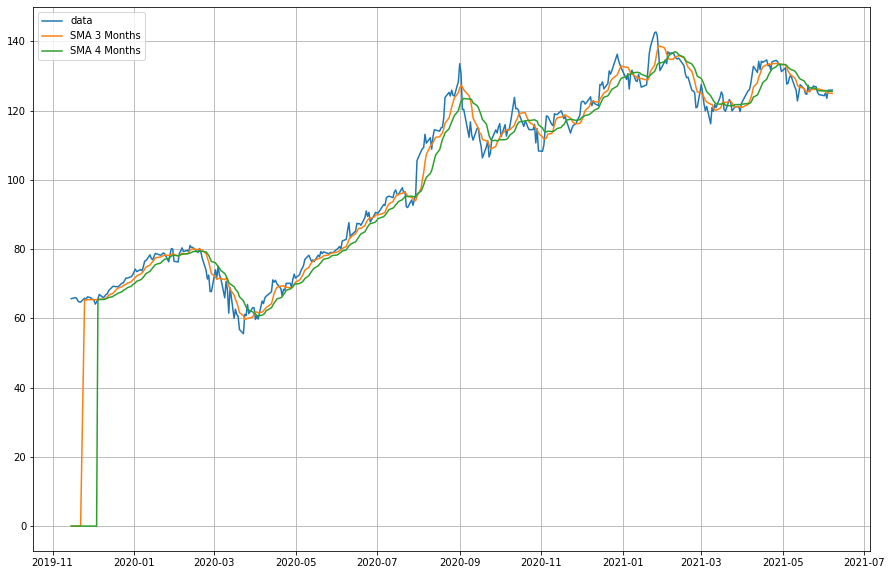

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['AC'],label='data')
plt.plot(df['ma7'],label='SMA 3 Months')
plt.plot(df['ma14'],label='SMA 4 Months')

# plt.plot(dfoptions2['strike'])
#
# plt.plot(dfoptions['strike'],label='strike')
plt.legend(loc=2)
plt.show()

In [67]:
dfoptions.reset_index(drop = True,inplace=True)
dfoptions2 = dfoptions.copy()
dfoptions2

,RFR_growthR,linear_req_growthR%,linear_req_growthR,strike+ask,price-strike,price,Ticker,strike_date,days_to_expiry,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
0,0.000192,-0.082129,-10.340000,114.25,103.400002,125.900002,AAPL,18/6/2021,10,22.50,100.80,89.70,91.75,0.000000,0.000000,NaN,28.0,0.000010,True
1,0.000192,0.062828,7.910000,503.95,-79.099998,125.900002,AAPL,18/6/2021,10,205.00,301.42,294.50,298.95,3.420013,1.147655,2.0,951.0,0.000000,False
2,0.000192,0.066799,8.410000,504.00,-84.099998,125.900002,AAPL,18/6/2021,10,210.00,294.00,289.70,294.00,0.000000,0.000000,1.0,641.0,0.000000,False
3,0.000192,0.070770,8.910000,504.35,-89.099998,125.900002,AAPL,18/6/2021,10,215.00,290.95,284.85,289.35,7.160004,2.522994,2.0,0.0,0.000000,False
4,0.000192,0.074742,9.410000,504.50,-94.099998,125.900002,AAPL,18/6/2021,10,220.00,288.00,280.15,284.50,3.000000,1.052632,4.0,1641.0,0.000000,False
5,0.000192,0.082685,10.410000,504.85,-104.099998,125.900002,AAPL,18/6/2021,10,230.00,275.80,270.75,274.85,3.799988,1.397054,30.0,915.0,0.000000,False
6,0.000192,0.086656,10.910000,505.30,-109.099998,125.900002,AAPL,18/6/2021,10,235.00,268.00,265.80,270.30,-6.029999,-2.200489,4.0,1319.0,0.000000,False
7,0.000192,0.090627,11.410000,505.45,-114.099998,125.900002,AAPL,18/6/2021,10,240.00,262.30,261.15,265.45,-2.700012,-1.018873,1.0,1543.0,0.000000,False
8,0.000192,0.094599,11.910000,505.85,-119.099998,125.900002,AAPL,18/6/2021,10,245.00,262.16,256.35,260.85,0.160004,0.061070,3.0,626.0,0.000000,False
9,0.000192,0.102542,12.910000,506.40,-129.099998,125.900002,AAPL,18/6/2021,10,255.00,251.11,246.60,251.40,1.809998,0.726032,9.0,76.0,0.000000,False


In [68]:
import datetime as dt
dt.datetime.strptime(dfoptions2['strike_date'][0], '%d/%m/%Y')
dfoptions2['strike_date'] = dfoptions2['strike_date'].apply(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
dfoptions2

dfoptions2 = dfoptions2.set_index('strike_date')
dfoptions2

,RFR_growthR,linear_req_growthR%,linear_req_growthR,strike+ask,price-strike,price,Ticker,days_to_expiry,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
strike_date,,,,,,,,,,,,,,,,,,
2021-06-18,0.000192,-0.082129,-10.340000,114.25,103.400002,125.900002,AAPL,10,22.50,100.80,89.70,91.75,0.000000,0.000000,NaN,28.0,0.000010,True
2021-06-18,0.000192,0.062828,7.910000,503.95,-79.099998,125.900002,AAPL,10,205.00,301.42,294.50,298.95,3.420013,1.147655,2.0,951.0,0.000000,False
2021-06-18,0.000192,0.066799,8.410000,504.00,-84.099998,125.900002,AAPL,10,210.00,294.00,289.70,294.00,0.000000,0.000000,1.0,641.0,0.000000,False
2021-06-18,0.000192,0.070770,8.910000,504.35,-89.099998,125.900002,AAPL,10,215.00,290.95,284.85,289.35,7.160004,2.522994,2.0,0.0,0.000000,False
2021-06-18,0.000192,0.074742,9.410000,504.50,-94.099998,125.900002,AAPL,10,220.00,288.00,280.15,284.50,3.000000,1.052632,4.0,1641.0,0.000000,False
2021-06-18,0.000192,0.082685,10.410000,504.85,-104.099998,125.900002,AAPL,10,230.00,275.80,270.75,274.85,3.799988,1.397054,30.0,915.0,0.000000,False
2021-06-18,0.000192,0.086656,10.910000,505.30,-109.099998,125.900002,AAPL,10,235.00,268.00,265.80,270.30,-6.029999,-2.200489,4.0,1319.0,0.000000,False
2021-06-18,0.000192,0.090627,11.410000,505.45,-114.099998,125.900002,AAPL,10,240.00,262.30,261.15,265.45,-2.700012,-1.018873,1.0,1543.0,0.000000,False
2021-06-18,0.000192,0.094599,11.910000,505.85,-119.099998,125.900002,AAPL,10,245.00,262.16,256.35,260.85,0.160004,0.061070,3.0,626.0,0.000000,False


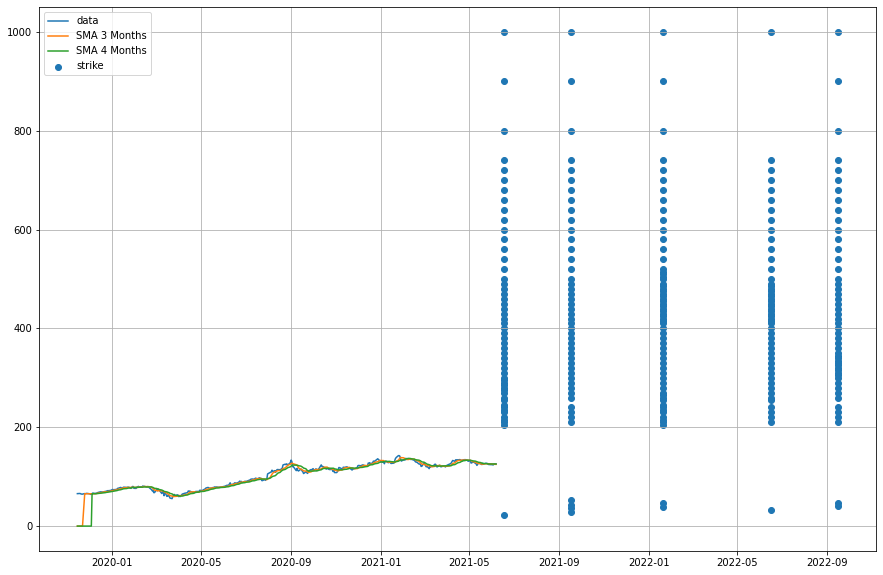

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['AC'],label='data')
plt.plot(df['ma7'],label='SMA 3 Months')
plt.plot(df['ma14'],label='SMA 4 Months')
# plt.plot(dfoptions2['strike'])
#
plt.scatter(dfoptions2.index,dfoptions2['strike'],label='strike')
plt.legend(loc=2)
plt.show()

In [50]:
data = yf.download(tickers = "AAPL")
price = data['Adj Close'][-1]
df_price = pd.DataFrame([[price]]*df_orig.shape[0], columns = ['price'])
df_price

[*********************100%***********************]  1 of 1 completed


,price
0,125.900002
1,125.900002
2,125.900002
3,125.900002
4,125.900002
5,125.900002
6,125.900002
7,125.900002
8,125.900002
9,125.900002


# Mass Apply function for each csv

# Test

In [19]:
import yfinance as yf

In [24]:
aapl = yf.Ticker("AAPL")
options_date = []
for i in msft.options:
    options_date.append(i)
print("len options_date:",len(options_date))
print("options_date:",options_date)


options_date: ['2021-06-11', '2021-06-18', '2021-06-25', '2021-07-02', '2021-07-09', '2021-07-16', '2021-07-23', '2021-08-20', '2021-09-17', '2021-10-15', '2021-11-19', '2021-12-17', '2022-01-21', '2022-06-17', '2022-09-16', '2023-01-20', '2023-03-17', '2023-06-16']


In [65]:


df = pd.read_csv('./options_data/semi_original/AAPL_options.csv')
df.drop('Unnamed: 0',axis=1, inplace= True)
df[df['bid'] != 0]

,strike_date,days_to_expiry,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
2,18/6/2021,10,AAPL210618C00022500,3/9/2020 18:47,22.50,100.80,89.70,91.75,0.000000,0.000000,NaN,28.0,0.000010,True,REGULAR,USD
76,18/6/2021,10,AAPL210618C00205000,28/8/2020 13:30,205.00,301.42,294.50,298.95,3.420013,1.147655,2.0,951.0,0.000000,False,REGULAR,USD
77,18/6/2021,10,AAPL210618C00210000,27/8/2020 19:59,210.00,294.00,289.70,294.00,0.000000,0.000000,1.0,641.0,0.000000,False,REGULAR,USD
78,18/6/2021,10,AAPL210618C00215000,25/8/2020 18:13,215.00,290.95,284.85,289.35,7.160004,2.522994,2.0,0.0,0.000000,False,REGULAR,USD
79,18/6/2021,10,AAPL210618C00220000,28/8/2020 19:46,220.00,288.00,280.15,284.50,3.000000,1.052632,4.0,1641.0,0.000000,False,REGULAR,USD
81,18/6/2021,10,AAPL210618C00230000,28/8/2020 15:41,230.00,275.80,270.75,274.85,3.799988,1.397054,30.0,915.0,0.000000,False,REGULAR,USD
82,18/6/2021,10,AAPL210618C00235000,26/8/2020 16:23,235.00,268.00,265.80,270.30,-6.029999,-2.200489,4.0,1319.0,0.000000,False,REGULAR,USD
83,18/6/2021,10,AAPL210618C00240000,27/8/2020 17:57,240.00,262.30,261.15,265.45,-2.700012,-1.018873,1.0,1543.0,0.000000,False,REGULAR,USD
84,18/6/2021,10,AAPL210618C00245000,28/8/2020 15:28,245.00,262.16,256.35,260.85,0.160004,0.061070,3.0,626.0,0.000000,False,REGULAR,USD
86,18/6/2021,10,AAPL210618C00255000,28/8/2020 16:39,255.00,251.11,246.60,251.40,1.809998,0.726032,9.0,76.0,0.000000,False,REGULAR,USD


[*********************100%***********************]  1 of 1 completed


125.9000015258789